In [ ]:
import torch
DATA = 'MNIST'
prefix = 'mnist_dnn_kl_d_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = 'KL_D'
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install import-ipynb

In [ ]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [ ]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))


60000 7000 3000 10000


##Visualising the data

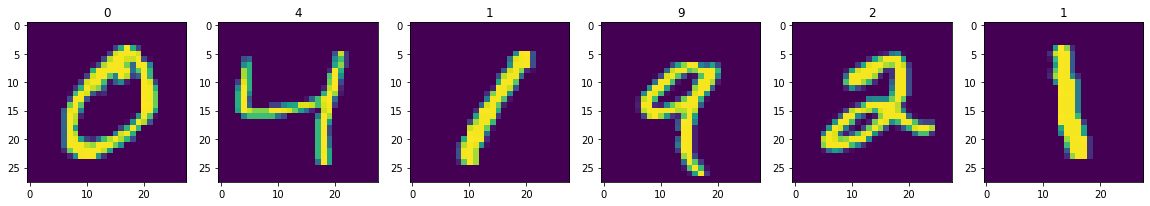

In [ ]:
plot_samples(trainSet, None)

In [ ]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(1, 6, 3, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryRelu(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [ ]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [ ]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(1,1/7)

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.11696529 and Accuracy: 96.16%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.08261865 and Accuracy: 97.30%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.07200560 and Accuracy: 97.64%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.05861326 and Accuracy: 98.19%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.05584835 and Accuracy: 98.34%
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.05451341 and Accuracy: 98.17%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.05253841 and Accuracy: 98.46%
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.04458218 and Accuracy: 98.50%
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.04237596 and Accuracy: 98.51%
Saving the model state dictionary for Epoch: 11 with Validation loss: 0.03650955 and Accur

In [ ]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.9920, device='cuda:0')


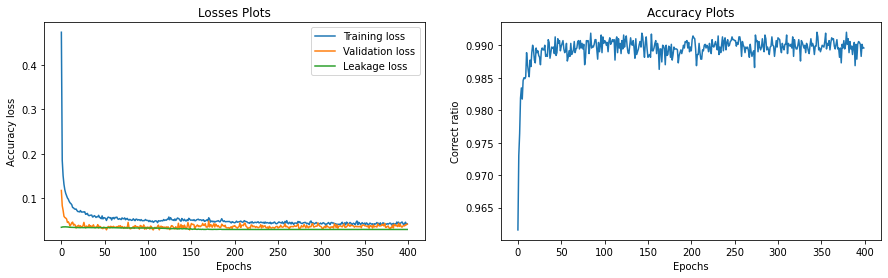

In [ ]:
plot_losses()


Test accuracy: 0.988


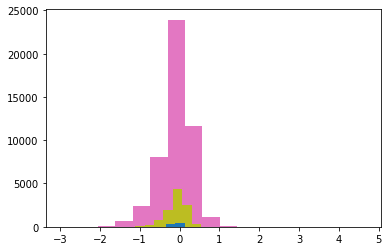

In [ ]:
test_model()

##Measuring Privacy Preserving

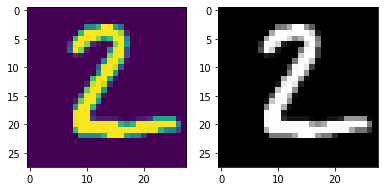

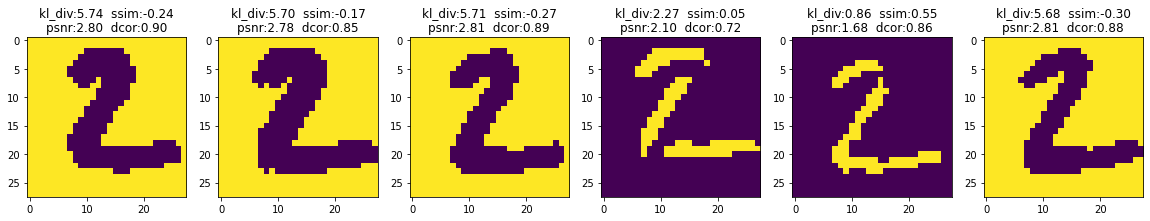

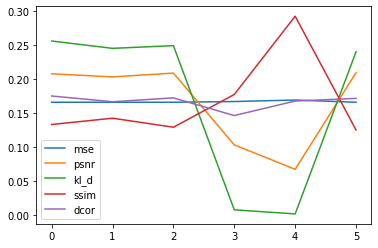

In [ ]:
plot_measure(measure_image(testSet[1][0]))


tensor(4.3642, device='cuda:0') 0.8892811071143755 tensor(0.2492, device='cuda:0')


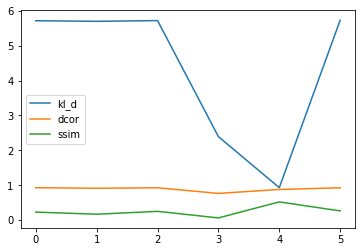

In [ ]:
plot_measures(measure_images())